# 13ª Geração do Campo Geomagnético de Referência (IGRF-13)

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

## Carregando os dados de inclinação, declinação, componente horizontal e campo total

In [2]:
fname_inc = 'dataset/igrfgridData_inclination.csv'
names = ['year', 'latitude','longitude','inclination']

In [3]:
inclination_data = pd.read_csv(fname_inc,usecols=(0,1,2,4),names=names,skipinitialspace=True,skiprows=13)

In [4]:
inclination_data

,year,latitude,longitude,inclination
0,2024.89891,90.0,-180.0,88.24817
1,2024.89891,90.0,-179.0,88.24817
2,2024.89891,90.0,-178.0,88.24817
3,2024.89891,90.0,-177.0,88.24817
4,2024.89891,90.0,-176.0,88.24817
...,...,...,...,...
65336,2024.89891,-90.0,176.0,-71.98769
65337,2024.89891,-90.0,177.0,-71.98769
65338,2024.89891,-90.0,178.0,-71.98769
65339,2024.89891,-90.0,179.0,-71.98769


## Armazenando dados em variáveis

In [5]:
lat = inclination_data.latitude.values
long = inclination_data.longitude.values
inclination = inclination_data.inclination.values

In [6]:
inclination

array([ 88.24817,  88.24817,  88.24817, ..., -71.98769, -71.98769,
       -71.98769])

## Configuração do campo para o ano de 2024

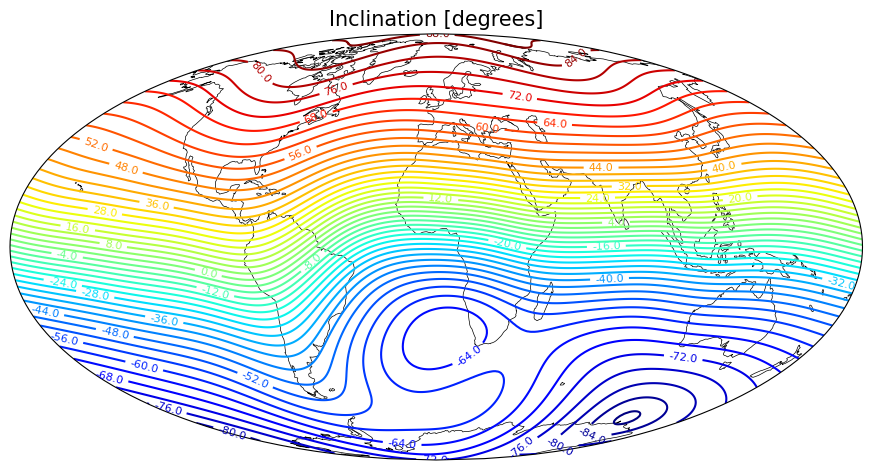

In [21]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Inclination [degrees]',fontsize=15)
cmap = ax.tricontour(long,lat,inclination,transform=ccrs.PlateCarree(),
                     cmap='jet',extend='both',levels=50)
ax.clabel(cmap, inline=True, fontsize=8, fmt='%1.1f')
#cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
#cbar.set_label('degrees',fontsize=10)

plt.savefig('images/inclination_map.png',dpi=200,bbox_inches='tight')
plt.show()